In [1]:
## WASTE MANAGEMENT USING CNN

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
#pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.6 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.6 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.6 MB 2.5 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.6 MB 2.7 MB/s eta 0:00:04
   ---------- ----------------------------- 3.1/11.6 MB 2.8 MB/s eta 0:00:03
   -------------- ------------------------- 4.2/11.6 MB 3.1 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.6 MB 3.2 MB/s eta 0:00:03
   -------------------- ------------------- 6.0/11.6 MB 3.4 MB/s eta 0:00:02
   ------------------------- -------------- 7.3/11.6 MB 3.7 MB/s eta 0:00:02
   ---------------------------- ----------- 8.4/11.6 MB 3.9 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.6 MB 4.2 MB/s eta 0:00:01
   ---------

In [3]:
#pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 4.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.0 MB 4.9 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.0 MB 4.7 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.0 MB 5.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.0 MB 5.1 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 6.6 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.9 MB/s eta 0:00:00
   -----------------------

In [5]:
#pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [6]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"

In [7]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [13]:
import cv2
import pandas as pd
import os
import glob
from tqdm import tqdm
train_path = "DATASET/TRAIN"
x_data = []
y_data = []
for category in glob.glob(train_path + '/*'):
    label = os.path.basename(category)  
    for file in tqdm(glob.glob(category + '/*')):
        img_array = cv2.imread(file) 
        if img_array is not None:  
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  
            x_data.append(img_array)
            y_data.append(label)
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [00:03<00:00, 2575.31it/s]


In [14]:
data.shape

(22564, 2)

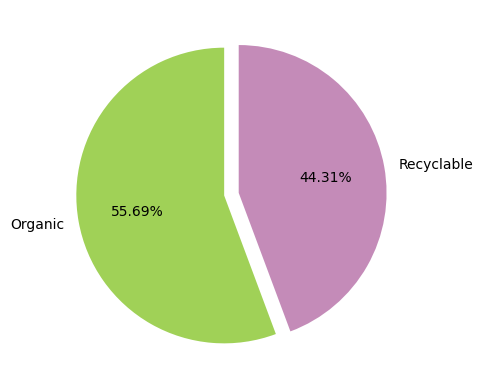

In [13]:

colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'],autopct='%0.2f%%', 
        colors = colors, startangle=90, explode=[0.05,0.05])
plt.show()

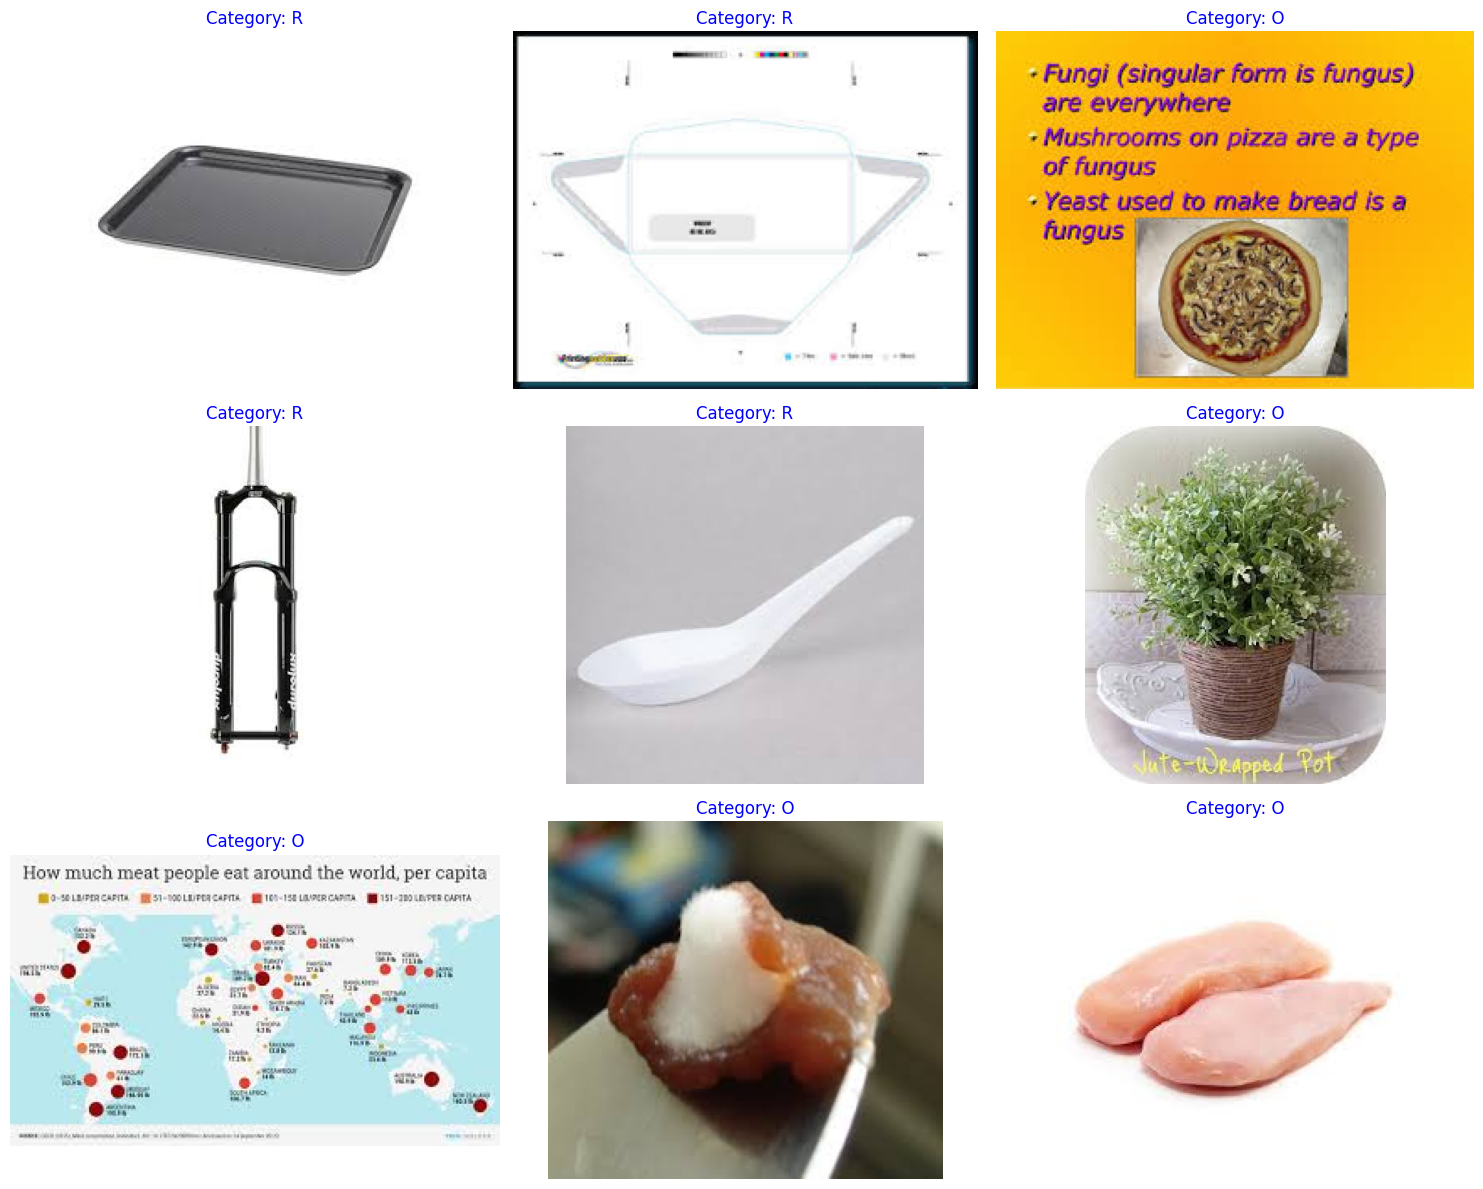

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))  

for i in range(9): 
    plt.subplot(3, 3, i+1)  
    index = np.random.randint(len(data))  
    plt.title(f"Category: {data.label[index]}", fontsize=12, color='blue')  
    plt.imshow(data.image[index])
    plt.axis("off")  
    plt.tight_layout()
plt.show()  


**#CNN**

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,185 (84.92 MB)

 Trainable params: 22,261,185 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
rain_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size=batch_size,
    color_mode = "rgb",
    class_mode="categorical"
)
test_generator = train_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size=batch_size,
    color_mode = "rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)